# Step1:download datset from website and load data using pandas libraries
some websites for datasets
-kaggle dataset,
-Google dataset search,
-UCI Machine Learning repository
-AWS Registry of open data
-Data.gov
-OpenML

## a. import all libraires which is required for your project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## from sklearn.preprocessing import StandardScalar

## b. load the data using read_excel function 

In [2]:
df=pd.read_excel("pima-data.xlsx")
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1.8912,False,False
764,2,122,70,27,0,36.8,0.340,27,0,1.0638,False,False
765,5,121,72,23,112,26.2,0.245,30,0,0.9062,False,False
766,1,126,60,0,0,30.1,0.349,47,1,0.0000,True,True


In [3]:
df.shape

(768, 12)

In [4]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes_orig', 'skin', 'has_diabetes',
       'diabetes'],
      dtype='object')

In [5]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,3.900600


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_preg       768 non-null    int64  
 1   glucose_conc   768 non-null    int64  
 2   diastolic_bp   768 non-null    int64  
 3   thickness      768 non-null    int64  
 4   insulin        768 non-null    int64  
 5   bmi            768 non-null    float64
 6   diab_pred      768 non-null    float64
 7   age            768 non-null    int64  
 8   diabetes_orig  768 non-null    int64  
 9   skin           768 non-null    float64
 10  has_diabetes   768 non-null    bool   
 11  diabetes       768 non-null    bool   
dtypes: bool(2), float64(3), int64(7)
memory usage: 61.6 KB


# Step2: Cleaning the datasets

## a. check the null values is present or not

In [7]:

## df.isnull()
print(df.isnull().sum()) #first try isnull then add sum

num_preg         0
glucose_conc     0
diastolic_bp     0
thickness        0
insulin          0
bmi              0
diab_pred        0
age              0
diabetes_orig    0
skin             0
has_diabetes     0
diabetes         0
dtype: int64


## note: i dont have any null values in my dataset so proceed next step
## -if you have null values you can follow either dropna or fillna

## b. remove duplicate columns
if you want  to find duplicate columns we can find correlation 

In [8]:
# if diagonal col have 1.00 then there is no correlation if other colmuns comes 1.00 then there is correlation

In [9]:
def plot_corr(df,size=12):
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    cmap='plasma'
    ax.matshow(corr,cmap=cmap)
    plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)  #for getting what is col names
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

In [10]:
# def plot_corr(df, size=12):
#     corr = df.corr()
#       # Create figure and axis
#     fig, ax = plt.subplots(figsize=(size, size))    
#     cmap = 'plasma'   
#     # Plot the correlation matrix
#     cax = ax.matshow(corr, cmap=cmap)   
#     # Add colorbar
#  ##   plt.colorbar(cax)  
#     # Set ticks with column names
#     plt.xticks(range(len(corr.columns)), corr.columns, rotation=20)
#     plt.yticks(range(len(corr.columns)), corr.columns)    
#     plt.show()


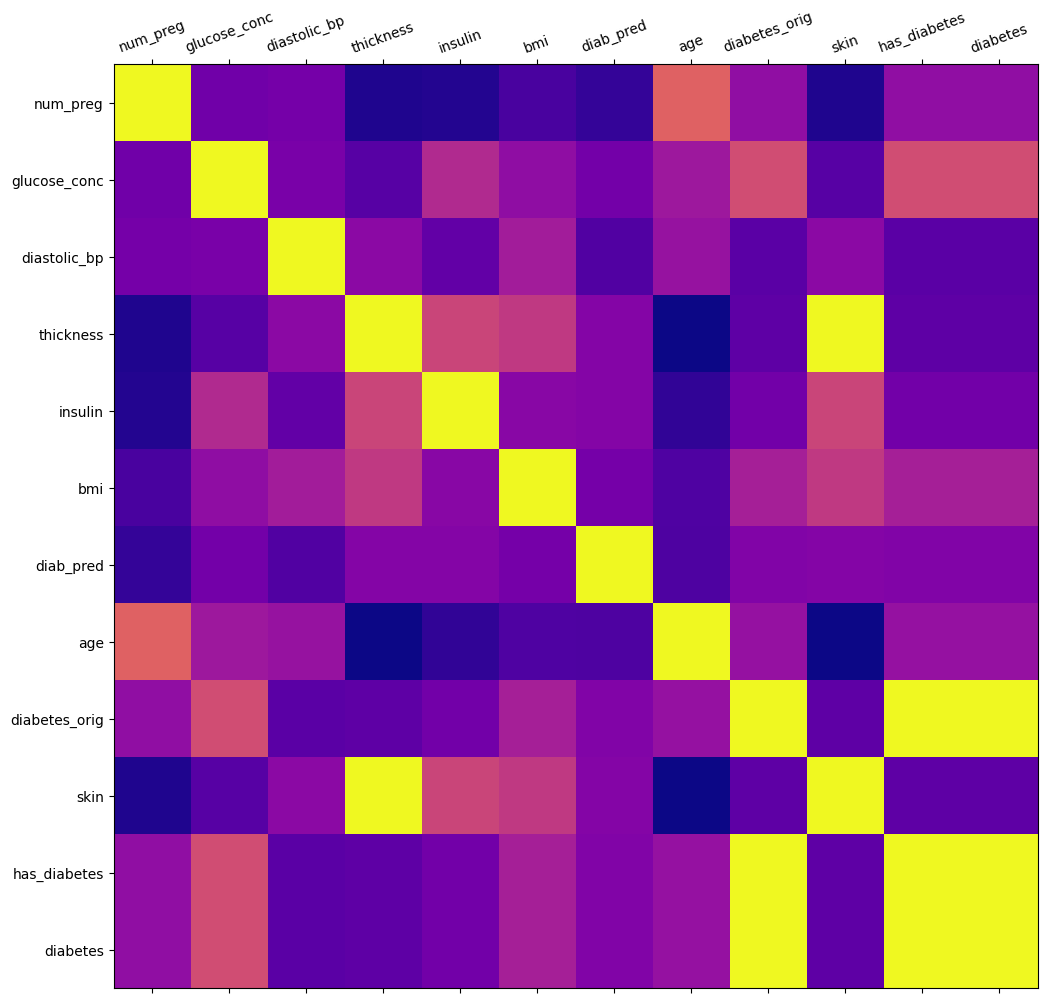

In [11]:
plot_corr(df)

## c. find the corelation between 2 column
### 1. Thickness and skin column are corelated to each other
### 2. diabetes_orign and has_diabetes are corelated to each other
### 3. diabetes and diabetes_orig are corelated to ecah other
### 4. diabetes and has_diabetes are corelated to each other

## case1: thickness,diabetes,has-diabetes
## case2: thickness,has_diabetes,diabetes_orig

## a. drop the correlated columns
# df.drop('thickness',axis=1,inplace=True) 
# df.drop('has_diabetes',axis=1,inplace=True)
# df.drop('diabetes_orig',axis=1,inplace=True)

In [12]:
df.drop(['thickness', 'has_diabetes', 'diabetes_orig'], axis=1, inplace=True)

In [13]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,False
764,2,122,70,0,36.8,0.340,27,1.0638,False
765,5,121,72,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,30.1,0.349,47,0.0000,True


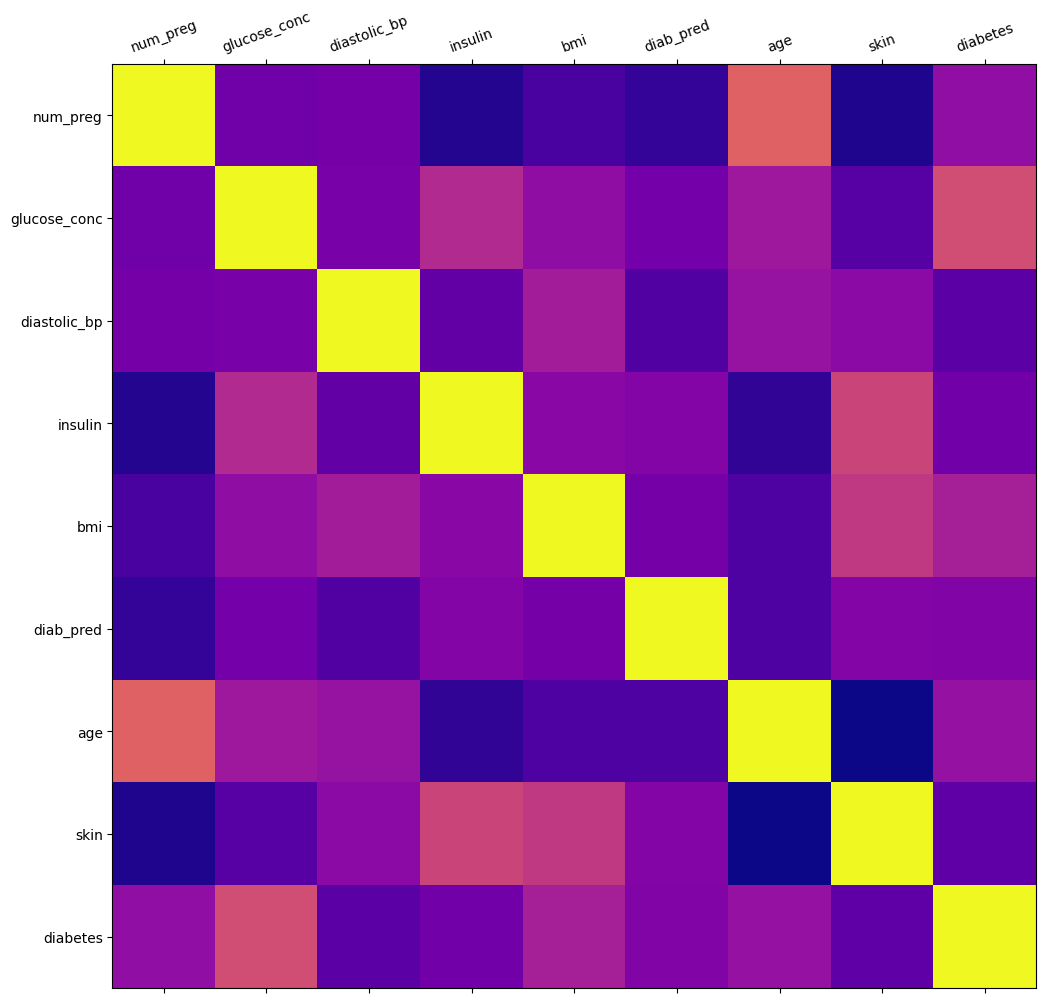

In [14]:
plot_corr(df)

## a.Convert  text to string

In [15]:
# df['diabetes'].unique()

In [16]:
# dict1={'diabetes':[True,False]}
# dict2={'diabestes':[1,0]}
# df.replace(dict1,dict2,inplace=True)

In [17]:
# # Mapping dictionary
diabetes_map = {True: 1, False: 0}

# # Apply mapping to the correct columns

df['diabetes'] = df['diabetes'].map(diabetes_map)

print(df.head())


   num_preg  glucose_conc  diastolic_bp  insulin   bmi  diab_pred  age  \
0         6           148            72        0  33.6      0.627   50   
1         1            85            66        0  26.6      0.351   31   
2         8           183            64        0  23.3      0.672   32   
3         1            89            66       94  28.1      0.167   21   
4         0           137            40      168  43.1      2.288   33   

     skin  diabetes  
0  1.3790         1  
1  1.1426         0  
2  0.0000         1  
3  0.9062         0  
4  1.3790         1  


In [18]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,0
764,2,122,70,0,36.8,0.340,27,1.0638,0
765,5,121,72,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,30.1,0.349,47,0.0000,1


## b. Check the proportion

In [19]:
num_true=len(df.loc[df['diabetes']==1]) 
num_false=len(df.loc[df['diabetes']==0]) 
print(f'num_true:{num_true}')
print(f'num_false:{num_false}')
percent_true=num_true/(num_true+num_false)*100
percent_false=num_false/(num_true+num_false)*100
print(percent_true)
print(percent_false)

num_true:268
num_false:500
34.89583333333333
65.10416666666666


In [20]:
df

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,1.8912,0
764,2,122,70,0,36.8,0.340,27,1.0638,0
765,5,121,72,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,30.1,0.349,47,0.0000,1


In [21]:
true_count=len(df.loc[df['diabetes']==True])
false_count=len(df.loc[df['diabetes']==False])
(true_count,false_count)

(268, 500)

# Step3: Train and test split

In [22]:
# pip install scikit-learn

In [23]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

#### how fun will split data?
-vertical split:btw input and output data [here 9 col ot cuts like 1,2,3,4,5,6,7,8||9]
-horizontal split: df.shape() 767 records 0.7*767=536 [1-536||536-...]0.7 split size
-check the shape


## a.

In [24]:
from sklearn.model_selection import train_test_split
input_columns=['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi','diab_pred', 'age', 'skin']
output_columns=['diabetes']
x=df[input_columns].values
y=df[output_columns].values
split_test_size=0.3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=42)

print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[  1.      95.      60.     ...   0.26    22.       0.7092]
 [  5.     105.      72.     ...   0.159   28.       1.1426]
 [  0.     135.      68.     ...   0.365   24.       1.6548]
 ...
 [ 10.     101.      86.     ...   1.136   38.       1.4578]
 [  0.     141.       0.     ...   0.205   29.       0.    ]
 [  0.     125.      96.     ...   0.262   21.       0.    ]]
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(537, 8)
(537, 1)
(231, 8)
(231, 1)


## b. check the train proportion and testing properties

In [26]:

print('{0:0.2f}% in training set'.format((len(x_train)/len(df.index))*100)) 
print('{0:0.2f}% in testing set'.format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in training set


In [27]:
print('training true:{0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==1]),
                                            (len(y_train[y_train[:]==1])/len(y_train))*100)) 
print('training false:{0} ({1:0.2f}%)'.format(len(y_train[y_train[:]==0]),
                                            (len(y_train[y_train[:]==0])/len(y_train))*100)) 

print('test true:{0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==1]),
                                            (len(y_test[y_test[:]==1])/len(y_test))*100)) 
print('test false:{0} ({1:0.2f}%)'.format(len(y_test[y_test[:]==0]),
                                            (len(y_test[y_test[:]==0])/len(y_test))*100))

training true:188 (35.01%)
training false:349 (64.99%)
test true:80 (34.63%)
test false:151 (65.37%)


In [28]:
## Post Split Prepartion
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi',
       'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

# Step4: finding missing rows in columns

In [29]:
total_num_preg=len(df.loc[df['num_preg']==0])
print(f'number of rows missing in numpreg column is :{total_num_preg}')

total_glucose_conc=len(df.loc[df['glucose_conc']==0])
print(f'number of rows missing in glucose_conc column is :{total_glucose_conc}')

total_diastolic_bp=len(df.loc[df['diastolic_bp']==0])
print(f'number of rows missing in diasrolic_bp column is :{total_diastolic_bp}')


total_diabetes=len(df.loc[df['diabetes']==0])
print(f'number of rows missing in diabetes column is :{total_diabetes}')


total_insulin=len(df.loc[df['insulin']==0])
print(f'number of rows missing in insulin column is :{total_insulin}')


total_bmi=len(df.loc[df['bmi']==0])
print(f'number of rows missing in bmi column is :{total_bmi}')


total_diab_pred=len(df.loc[df['diab_pred']==0])
print(f'number of rows missing in diab_pred column is :{total_diab_pred}')


total_age=len(df.loc[df['age']==0])
print(f'number of rows missing in age column is :{total_age}')


total_skin=len(df.loc[df['skin']==0])
print(f'number of rows missing in skin column is :{total_skin}')



number of rows missing in numpreg column is :111
number of rows missing in glucose_conc column is :5
number of rows missing in diasrolic_bp column is :35
number of rows missing in diabetes column is :500
number of rows missing in insulin column is :374
number of rows missing in bmi column is :11
number of rows missing in diab_pred column is :0
number of rows missing in age column is :0
number of rows missing in skin column is :227


In [30]:
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy='mean')
x_train=fill_0.fit_transform(x_train) 
x_test=fill_0.transform(x_test)

In [31]:
x_train[0:5]

array([[1.00000000e+00, 9.50000000e+01, 6.00000000e+01, 5.80000000e+01,
        2.39000000e+01, 2.60000000e-01, 2.20000000e+01, 7.09200000e-01],
       [5.00000000e+00, 1.05000000e+02, 7.20000000e+01, 3.25000000e+02,
        3.69000000e+01, 1.59000000e-01, 2.80000000e+01, 1.14260000e+00],
       [4.34056399e+00, 1.35000000e+02, 6.80000000e+01, 2.50000000e+02,
        4.23000000e+01, 3.65000000e-01, 2.40000000e+01, 1.65480000e+00],
       [4.00000000e+00, 1.31000000e+02, 6.80000000e+01, 1.66000000e+02,
        3.31000000e+01, 1.60000000e-01, 2.80000000e+01, 8.27400000e-01],
       [1.00000000e+00, 1.03000000e+02, 3.00000000e+01, 8.30000000e+01,
        4.33000000e+01, 1.83000000e-01, 3.30000000e+01, 1.49720000e+00]])

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Step5: Training Model
### train model using Navie-based Algorithm

In [34]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB() #creating object for Gaussian Class
nb_model.fit(x_train,y_train.ravel())  # train a model #fit is method for training data

,priors,None
,var_smoothing,1e-09


In [35]:
from sklearn import metrics #metric for getting accuracy

nb_predict_model=nb_model.predict(x_train) #predict the ans and store in nb_predict_model


print(f'predicted accuracy {metrics.accuracy_score(y_train,nb_predict_model)}')

predicted accuracy 0.7541899441340782


In [36]:
nb_predict_test=nb_model.predict(x_test)
from sklearn import metrics
print('accuracy:{0:.4f}'.format(metrics.accuracy_score(y_test,nb_predict_test)))

accuracy:0.7532


# Step6: Testing Model

In [37]:
print("confusion matrix")
print(f'{metrics.confusion_matrix(y_test,nb_predict_test)}')
      

confusion matrix
[[123  28]
 [ 29  51]]


In [38]:
## accuracy=((tp+tn)/(tp+fp+fn+tn))*100  [[tp  tn][fp fn]]  [[118 33][28 52]]
(118+52)/(118+33+28+52)*100  #jjust for checkin correct or not 

73.59307359307358

In [39]:
print('classification report')
print(metrics.classification_report(y_test,nb_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



### Random-forest Algorithm

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42) #creating obj for RandomForestClassifier
rf_model.fit(x_train,y_train.ravel()) #Training a machine

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
from sklearn import metrics #metric for getting accuracy

rf_predict_model=rf_model.predict(x_train) #predict the ans and store in nb_predict_model


print(f'predicted accuracy {metrics.accuracy_score(y_train,rf_predict_model)}')

predicted accuracy 1.0


In [42]:
rf_predict_test=rf_model.predict(x_test)
print(f'predicted accuracy:{metrics.accuracy_score(y_test,rf_predict_test)}')

predicted accuracy:0.7402597402597403


In [43]:
print("confusion matrix")
print(f'{metrics.confusion_matrix(y_test,rf_predict_test)}')
      

confusion matrix
[[121  30]
 [ 30  50]]


In [44]:
(120+54)/(120+31+26+54)*100

75.32467532467533

In [45]:
print('classification report')
print(metrics.classification_report(y_test,rf_predict_test))

classification report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



### Knn Algorithm

In [46]:
from sklearn.neighbors import KNeighborsClassifier
K_neighbor=KNeighborsClassifier()
K_neighbor.fit(x_train,y_train.ravel())

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
from sklearn import metrics #metric for getting accuracy

x_pred=K_neighbor.predict(x_train) #predict the ans and store in nb_predict_model

print(f'predicted accuracy {metrics.accuracy_score(y_train,x_pred)}')

predicted accuracy 0.8379888268156425


In [48]:
x_pred=rf_model.predict(x_test)
print(f'predicted accuracy:{metrics.accuracy_score(y_test,x_pred)}')

predicted accuracy:0.7402597402597403


In [49]:
print('classification report')
print(metrics.classification_report(y_test,x_pred))

classification report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Conclusion: we had trained three algorithm i.e, navie bayes,randomforest,and knn
## as we got  75,73 & 75 percentage so i will prefer random forest classifier algo for my model

In [53]:
#input_data=[1,85,65,0,25.6,0.352,2.2428]
input_data=[2,197,70,543,30.5,0.158,53,1.773]
input_array=np.asarray(input_data).reshape(1,-1)
print(input_array)

# Apply the same imputer and scaler to new data

input_array=fill_0.transform(input_array)
input_array=scaler.transform(input_array)
prediction=rf_model.predict(input_array)
print('Prediction:','diabetic' if prediction[0]==1 else 'not diabetic')

[[2.000e+00 1.970e+02 7.000e+01 5.430e+02 3.050e+01 1.580e-01 5.300e+01
  1.773e+00]]
Prediction: diabetic


In [55]:
import pickle
# save model
with open('rf_model.pkl','wb') as f: ## wb= opening & writing in binary
    pickle.dump(rf_model,f)
# save scaler
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
# save imputer
with open('imputer.pkl','wb') as f:
    pickle.dump(fill_0,f)